Pada Final Project ini yang saya lakukan adalah membuat model machine learning Linear Regresion dengan menggunakan Uber and Lyft Dataset Boston, MA. Tujuan untama dari model ini adalah untuk mempresiksi kolom 'price' atau harga tarif taksi yang berbeda dengan menggunakan fitur yang tersedia setelah fiturnya diseleksi.

### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium

### Data Loading

In [2]:
df = pd.read_csv('rideshare_kaggle.csv')
df.head(3)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000


In [3]:
df.axes

[RangeIndex(start=0, stop=693071, step=1),
 Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
        'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
        'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
        'apparentTemperature', 'short_summary', 'long_summary',
        'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
        'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
        'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
        'apparentTemperatureHigh', 'apparentTemperatureHighTime',
        'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
        'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
        'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
        'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
        'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
        'apparentTemperatureMin

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [5]:
df['datetime'] = pd.to_datetime(df['datetime'])

### Data Cleaning

Terdapat 55095 nilai  missing value pada kolom price

In [6]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

kita akan menghapus nilai missing value dengan fungsi dropna()

In [7]:
df.dropna(axis=0,inplace=True)

In [8]:
df.isnull().sum().sum()

0

In [9]:
df['datetime'] = pd.to_datetime(df['datetime'])

Cek Duplikasi

In [10]:
df.duplicated(subset=None).sum()

0

### Eksplorasi Data

#### Cek Outliers

In [11]:
df1 = df['price'].fillna(df['price'].mean())

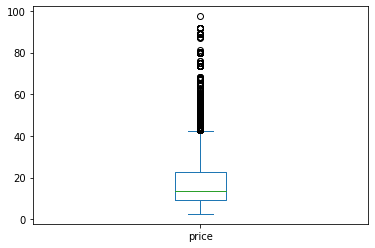

In [12]:
df1.plot(kind='box')
plt.show()

In [13]:
#Q1, Q3, dan IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

#Cek ukuran baris dan kolom sebelum data otliers di buang
print('Shape awal: ', df.shape)

Shape awal:  (637976, 57)


Menghapus Outlier panda Kolom Price

In [14]:
df = df[~((df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR)))]

In [15]:
# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', df.shape)

Shape akhir:  (632387, 57)


### Visualisasi

#### 1. Price-Destination

In [16]:
price_destination = df["price"].groupby(df["destination"], axis=0).mean()


Text(0, 0.5, 'Price')

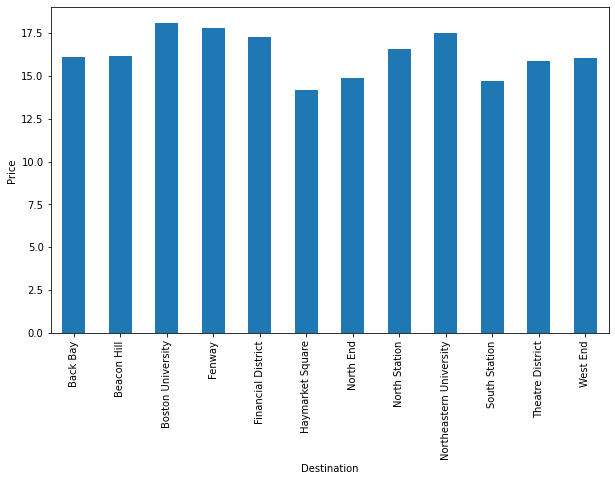

In [17]:
price_destination.plot(kind='bar',figsize=(10, 6))
plt.xlabel('Destination')
plt.ylabel('Price')

#### 2. Cab-Type

C:\Users\bamba\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'count')

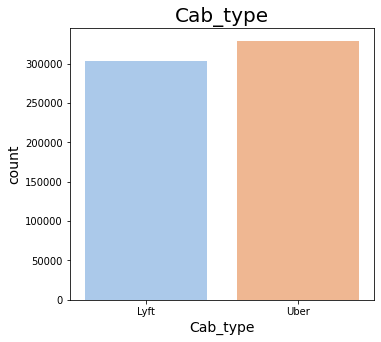

In [18]:
plt.rcParams['figure.figsize'] = (12, 5)
plt.subplot(1,2,1)
sns.countplot(df['cab_type'], palette = 'pastel')
plt.title('Cab_type', fontsize =20)
plt.xlabel('Cab_type', fontsize = 14)
plt.ylabel('count', fontsize = 14)

In [19]:
def visualisasi(groupby_column):
    df1 =df.groupby(groupby_column).size().reset_index(name="counts")
    fig1 = px.bar(data_frame=df1, x=groupby_column, y="counts", color=groupby_column, barmode="group")
    print(df1)

#### 3.Month

In [20]:
visualisasi('month')

   month  counts
0     11  261406
1     12  370981


#### 4. Day

In [21]:
visualisasi('day')

    day  counts
0     1   41297
1     2   40925
2     3   40987
3     4   11528
4     9    1520
5    10    2515
6    13   35186
7    14   41016
8    15   40971
9    16   41014
10   17   41009
11   18   33013
12   26   28754
13   27   69497
14   28   67244
15   29   54728
16   30   41183


#### 5. Source

In [22]:
visualisasi('source')

                     source  counts
0                  Back Bay   52728
1               Beacon Hill   52683
2         Boston University   52292
3                    Fenway   52439
4        Financial District   52361
5          Haymarket Square   53132
6                 North End   53147
7             North Station   52488
8   Northeastern University   52590
9             South Station   52998
10         Theatre District   52622
11                 West End   52907


#### 6. Destiantion

In [23]:
visualisasi('destination')

                destination  counts
0                  Back Bay   53043
1               Beacon Hill   52677
2         Boston University   51702
3                    Fenway   52591
4        Financial District   52942
5          Haymarket Square   53022
6                 North End   52953
7             North Station   52211
8   Northeastern University   52586
9             South Station   52935
10         Theatre District   52986
11                 West End   52739


### Analisis pada kolom Price (Target)

Kita akan cek korelasi fiture dibawah ini terhadap kolom price (Target), apakah memiliki korelasi yang baik atau tidak

In [24]:
new_df = df.drop(['id','timestamp','datetime','long_summary','apparentTemperatureHighTime','apparentTemperatureLowTime',
                  'apparentTemperatureLowTime','windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',
                 'temperatureMaxTime','apparentTemperatureMinTime','temperatureLowTime','apparentTemperatureMaxTime'],axis=1)

In [25]:
temp_cols= ['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax','price']

In [26]:
df_temp = new_df[temp_cols]
df_temp.head()

,temperature,apparentTemperature,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,temperatureMin,temperatureHighTime,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,price
0,42.34,37.12,43.68,34.19,37.95,27.39,39.89,1544968800,43.68,33.73,38.07,5.0
1,43.58,37.35,47.30,42.10,43.92,36.20,40.49,1543251600,47.30,36.20,43.92,11.0
2,38.33,32.93,47.55,33.10,44.12,29.11,35.36,1543320000,47.55,31.04,44.12,7.0
3,34.38,29.63,45.03,28.90,38.53,26.20,34.67,1543510800,45.03,30.30,38.53,26.0
4,37.44,30.88,42.18,36.71,35.75,30.29,33.10,1543420800,42.18,29.11,35.75,9.0


<AxesSubplot:>

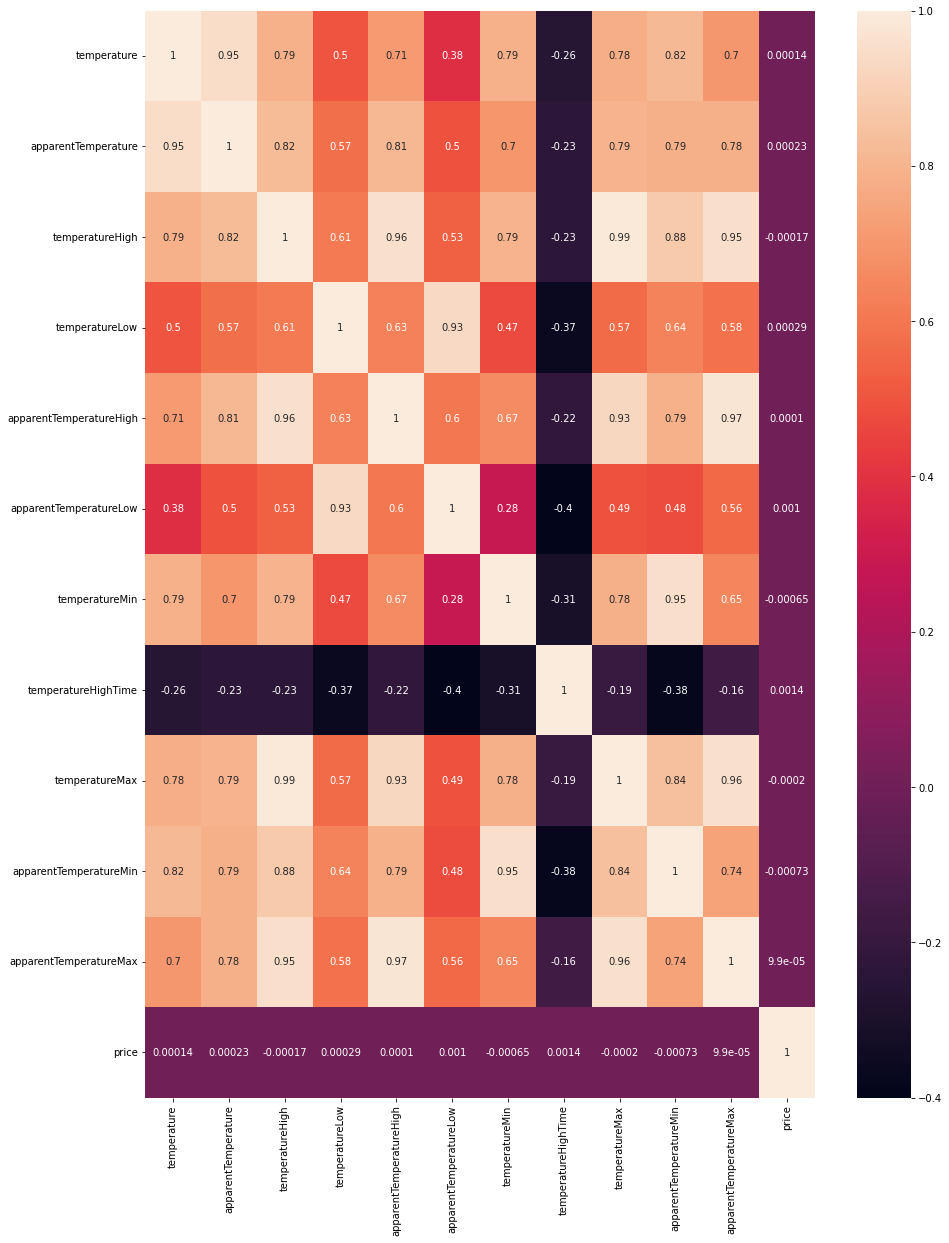

In [27]:
plt.figure(figsize=(15,20))
sns.heatmap(df_temp.corr(),annot=True)

Semua feature diatas tidak memiliki korelasi yang bagus terhadap kolom 'price', jadi kita hapus saja feature-feature tersebut

In [28]:
new_df = new_df.drop(['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax'],axis=1)
new_df.shape

(632387, 31)

cek korelasi feature lainnya terhadap kolom price(Target)

In [29]:
climate_column = ['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax','price']
df_clim = new_df[climate_column]
df_clim.head()

,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,price
0,0.0000,0.0,0.68,8.66,9.17,10.000,32.70,1021.98,57,0.72,0,303.8,0.30,0.1276,5.0
1,0.1299,1.0,0.94,11.98,11.98,4.786,41.83,1003.97,90,1.00,0,291.1,0.64,0.1300,11.0
2,0.0000,0.0,0.75,7.33,7.33,10.000,31.10,992.28,240,0.03,0,315.7,0.68,0.1064,7.0
3,0.0000,0.0,0.73,5.28,5.28,10.000,26.64,1013.73,310,0.00,0,291.1,0.75,0.0000,26.0
4,0.0000,0.0,0.70,9.14,9.14,10.000,28.61,998.36,303,0.44,0,347.7,0.72,0.0001,9.0


<AxesSubplot:>

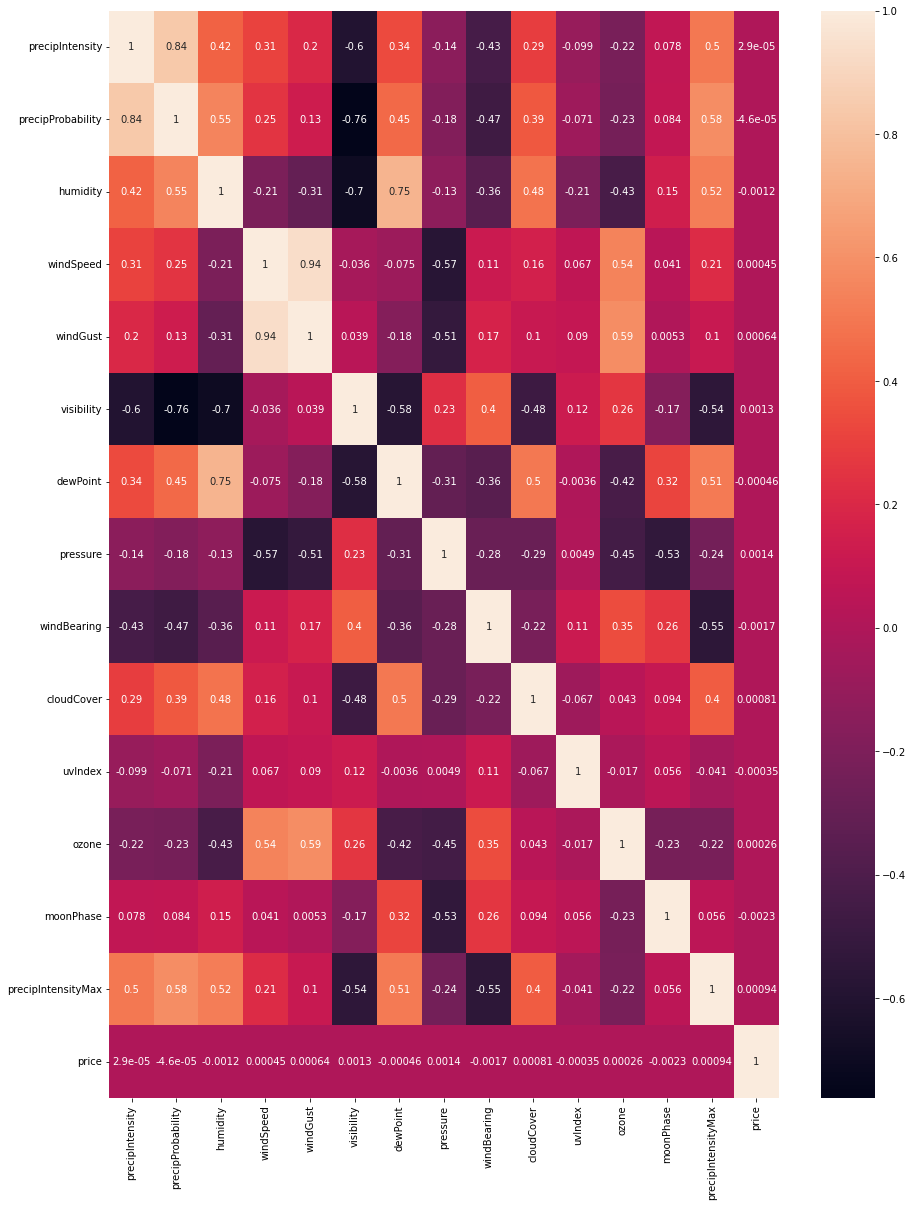

In [30]:
plt.figure(figsize=(15,20))
sns.heatmap(df_clim.corr(),annot=True)

Feature-feature diatas juga tidak memiliki korelasi yang bagus, jadi kita akan hapus saja

In [31]:
new_df = new_df.drop(['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax'],axis=1)
new_df.shape

(632387, 17)

Dataset ini memiliki feature yang bernilai kategorika, maka kita akan cek feature ini apakah memiliki korelasi atau tidak

In [32]:
category_col = new_df.select_dtypes(include=['object','category']).columns.tolist()
for column in new_df[category_col]:
    print(f'{column} : {new_df[column].unique()}')
    print()

timezone : ['America/New_York']

source : ['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']

destination : ['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']

cab_type : ['Lyft' 'Uber']

product_id : ['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux'
 '6f72dfc5-27f1-42e8-84db-ccc7a75f6969'
 '6c84fd89-3f11-4782-9b50-97c468b19529'
 '55c66225-fbe7-4fd5-9072-eab1ece5e23e'
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d'
 '6d318bcc-22a3-4af6-bddd-b409bfce1546'
 '997acbb5-e102-41e1-b155-9df7de0a73f2']

name : ['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool']

short_summary : [' Mostly Cloudy ' ' Rain ' ' Clear ' ' Partly Clou

In [33]:
new_df = new_df.drop(['timezone','product_id'],axis=1)

In [34]:
new_cat = ['source',
 'destination',
 'cab_type',
 'name',
 'short_summary',
 'icon','price']

df_cat = new_df[new_cat]
df_cat.head()

,source,destination,cab_type,name,short_summary,icon,price
0,Haymarket Square,North Station,Lyft,Shared,Mostly Cloudy,partly-cloudy-night,5.0
1,Haymarket Square,North Station,Lyft,Lux,Rain,rain,11.0
2,Haymarket Square,North Station,Lyft,Lyft,Clear,clear-night,7.0
3,Haymarket Square,North Station,Lyft,Lux Black XL,Clear,clear-night,26.0
4,Haymarket Square,North Station,Lyft,Lyft XL,Partly Cloudy,partly-cloudy-night,9.0


KIta akan mengubah nilai kategorikal ke dalam data numerik

In [35]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df_cat_encode= df_cat.copy()
for col in df_cat_encode.select_dtypes(include='O').columns:
    df_cat_encode[col]=le.fit_transform(df_cat_encode[col])

In [36]:
df_cat_encode

,source,destination,cab_type,name,short_summary,icon,price
0,5,7,0,7,4,5,5.0
1,5,7,0,2,8,6,11.0
2,5,7,0,5,0,1,7.0
3,5,7,0,4,0,1,26.0
4,5,7,0,6,6,5,9.0
...,...,...,...,...,...,...,...
693065,11,6,1,11,6,5,9.5
693066,11,6,1,10,6,5,13.0
693067,11,6,1,9,6,5,9.5
693069,11,6,1,1,6,5,27.0


<AxesSubplot:>

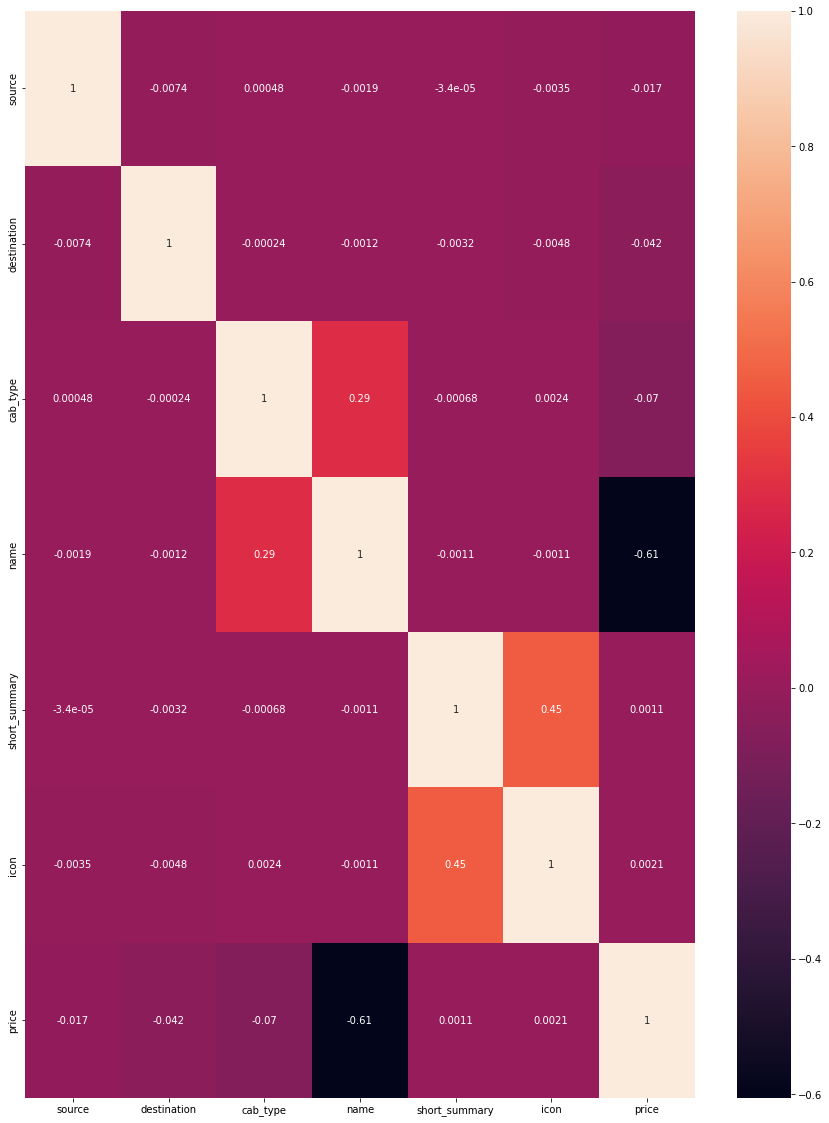

In [37]:
plt.figure(figsize=(15,20))
sns.heatmap(df_cat_encode.corr(),annot=True)

Dari feature diatas hanya kolom name yang cukup memiliki korelasi, yang lainnya tidak, jadi kita akan menghapusnya

In [38]:
new_df = new_df.drop(['source','destination','short_summary','icon'],axis=1)
new_df.head()

,hour,day,month,cab_type,name,price,distance,surge_multiplier,latitude,longitude,visibility.1
0,9,16,12,Lyft,Shared,5.0,0.44,1.0,42.2148,-71.033,10.000
1,2,27,11,Lyft,Lux,11.0,0.44,1.0,42.2148,-71.033,4.786
2,1,28,11,Lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,10.000
3,4,30,11,Lyft,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,10.000
4,3,29,11,Lyft,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,10.000


Hapus kolom hour day month latitude dan longitude

In [39]:
new_df = new_df.drop(['hour','day','month','latitude','longitude'],axis=1)
new_df.head()

,cab_type,name,price,distance,surge_multiplier,visibility.1
0,Lyft,Shared,5.0,0.44,1.0,10.000
1,Lyft,Lux,11.0,0.44,1.0,4.786
2,Lyft,Lyft,7.0,0.44,1.0,10.000
3,Lyft,Lux Black XL,26.0,0.44,1.0,10.000
4,Lyft,Lyft XL,9.0,0.44,1.0,10.000


In [40]:
new_df = new_df.drop(['visibility.1'],axis=1)

Berikut kolom yang memiliki korelasi yang bagus untuk modeling

In [41]:
new_df.head()

,cab_type,name,price,distance,surge_multiplier
0,Lyft,Shared,5.0,0.44,1.0
1,Lyft,Lux,11.0,0.44,1.0
2,Lyft,Lyft,7.0,0.44,1.0
3,Lyft,Lux Black XL,26.0,0.44,1.0
4,Lyft,Lyft XL,9.0,0.44,1.0


In [42]:
new_df.columns

Index(['cab_type', 'name', 'price', 'distance', 'surge_multiplier'], dtype='object')

### Regressi model

proses one hot encoding

In [43]:
new_df_onehot = pd.get_dummies(new_df)
new_df_onehot.head()

,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5.0,0.44,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,11.0,0.44,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7.0,0.44,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,26.0,0.44,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,9.0,0.44,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


### Dataset split

In [44]:
from sklearn.model_selection import train_test_split
X = new_df_onehot.drop(columns=['price'],axis=1).values 
y = new_df_onehot['price'].values 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Modeling

In [45]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
model = reg.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [46]:
x = reg.coef_


In [47]:
reg.coef_

array([2.66613411e+00, 1.36567531e+01, 3.12612626e+10, 6.26034083e+10,
       1.16341467e+11, 1.16341468e+11, 1.47683613e+11, 1.47683613e+11,
       1.47683613e+11, 1.47683613e+11, 1.47683613e+11, 1.47683613e+11,
       1.16341467e+11, 1.16341467e+11, 1.16341467e+11, 1.16341467e+11])

In [48]:
reg.intercept_

-178944875797.02768

In [49]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9337801799735589

Model yang sudah dibuat memiliki score 93%

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error  
import numpy as np
import matplotlib.pyplot as plt 

mse = mean_squared_error(y_test, y_pred)
print('Mean squared error of testing set:', mse)
#Calculating MAE
mae = mean_absolute_error(y_test, y_pred)
print('Mean absolute error of testing set:', mae)
#Calculating RMSE
rmse = np.sqrt(mse)
print('Root Mean Squared Error of testing set:', rmse)


Mean squared error of testing set: 5.10828476238191
Mean absolute error of testing set: 1.6761478177214904
Root Mean Squared Error of testing set: 2.2601514910248626


### Kesimpulan

dengan nilai score sebesar 93% maka dengan ini model yang dibuat masuk ke kategori bagus, kemudian nilai MSE, MAE, dan RMSE juga sudah bagus